In [1]:
import tensorflow as tf
import os 
import zipfile as zp

In [2]:

base_dir = os.path.join('E:/data')

train_dir= os.path.join(base_dir, 'train')
test_dir= os.path.join(base_dir, 'test')



# Training 

train_fresh_dir   = os.path.join(train_dir, 'fresh')
train_rotten_dir  = os.path.join(train_dir, 'rotten')

# Validation
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Testing 

test_fresh_dir   = os.path.join(test_dir, 'fresh')
test_rotten_dir  = os.path.join(test_dir, 'rotten')


In [3]:
train_fresh_fnames=os.listdir(train_fresh_dir)
train_rotten_fnames=os.listdir(train_rotten_dir)

In [8]:
print(train_fresh_fnames[:5])

['vertical_flip_Screen Shot 2018-06-08 at 5.34.21 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 4.59.57 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.03 PM.png']


In [9]:
print(len(train_fresh_fnames))
print(len(train_rotten_fnames))

4740
6161


In [10]:
# Validation Dataset 

validation_fresh_fnames=train_fresh_fnames[:949]
validation_rotten_fnames=train_rotten_fnames[:1233]

# Training Dataset

train_fresh_fnames = train_fresh_fnames[950:]
train_rotten_fnames = train_rotten_fnames[1234:]








# For Validation

validation_dir= os.path.join(base_dir, 'validation')
validation_fresh_dir   = os.path.join(validation_dir, 'fresh')
validation_rotten_dir  = os.path.join(validation_dir, 'rotten')



In [11]:
# Number of images 

print("Number of fresh  images for Validation  : ",len(validation_fresh_fnames))
print("Number of rotten images for Validation : ",len(validation_rotten_fnames))
print("\n\n")

print("Number of fresh  images for Training    : ",len(train_fresh_fnames))
print("Number of rotten images for Training   : ",len(train_rotten_fnames)) 


Number of fresh  images for Validation  :  949
Number of rotten images for Validation :  1233



Number of fresh  images for Training    :  3790
Number of rotten images for Training   :  4927


In [12]:
%matplotlib inline 

# Importing the Libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [13]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

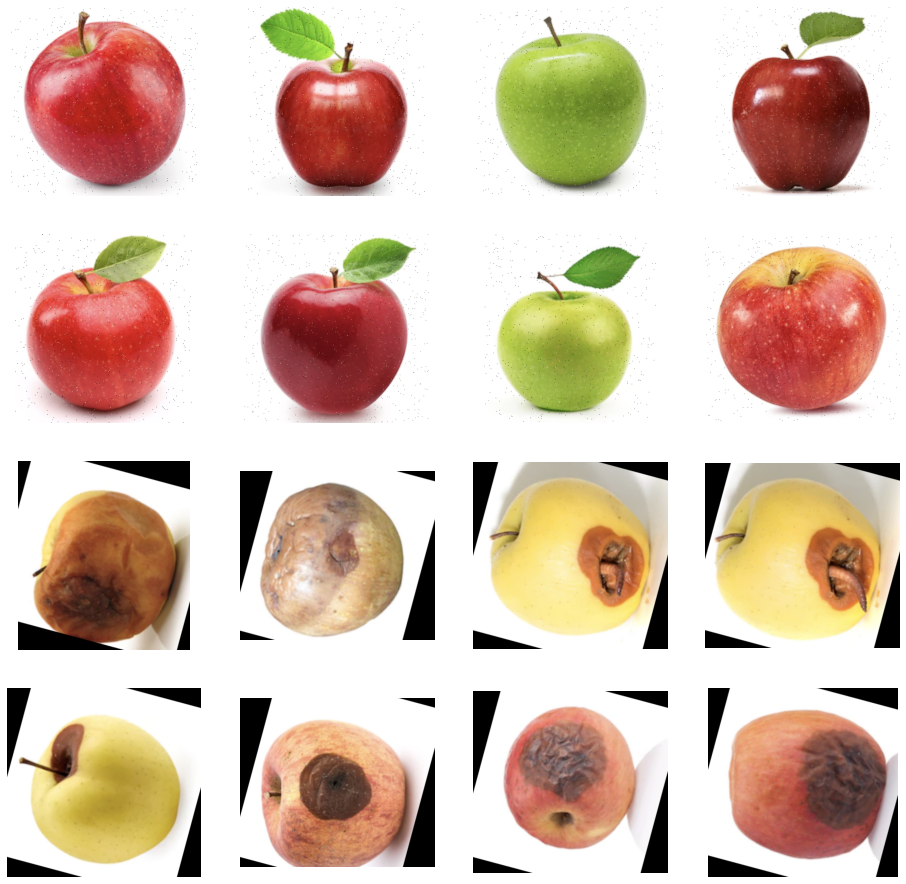

In [14]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

# Using only the training dataset
# next_cat_pix

train_fresh = [os.path.join(train_fresh_dir , fname) 
                for fname in train_fresh_fnames[ pic_index-8:pic_index] 
               ]

train_rotten = [os.path.join(train_rotten_dir, fname) 
                for fname in train_rotten_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(train_fresh+train_rotten):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [37]:
# Model Definition

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), # (250, 250, 3)) 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 256)      

In [39]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))# (250, 250))    
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))# (250, 250))


Found 10901 images belonging to 2 classes.
Found 5450 images belonging to 2 classes.


In [41]:

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=25,
                              validation_steps=50,
                              verbose=2)
                              


Epoch 1/25
100/100 - 99s - loss: 0.5843 - accuracy: 0.6790 - val_loss: 0.4188 - val_accuracy: 0.8250
Epoch 2/25
100/100 - 137s - loss: 0.4082 - accuracy: 0.8107 - val_loss: 0.3089 - val_accuracy: 0.8660
Epoch 3/25
100/100 - 117s - loss: 0.3516 - accuracy: 0.8440 - val_loss: 0.2777 - val_accuracy: 0.8930
Epoch 4/25
100/100 - 119s - loss: 0.3141 - accuracy: 0.8680 - val_loss: 0.2692 - val_accuracy: 0.8880
Epoch 5/25
100/100 - 118s - loss: 0.2914 - accuracy: 0.8805 - val_loss: 0.3138 - val_accuracy: 0.8740
Epoch 6/25
100/100 - 101s - loss: 0.2675 - accuracy: 0.8815 - val_loss: 0.2403 - val_accuracy: 0.9120
Epoch 7/25
100/100 - 103s - loss: 0.2593 - accuracy: 0.8985 - val_loss: 0.2215 - val_accuracy: 0.9190
Epoch 8/25
100/100 - 95s - loss: 0.2438 - accuracy: 0.9050 - val_loss: 0.2177 - val_accuracy: 0.9170
Epoch 9/25
100/100 - 91s - loss: 0.2243 - accuracy: 0.9165 - val_loss: 0.2272 - val_accuracy: 0.9140
Epoch 10/25
100/100 - 87s - loss: 0.2270 - accuracy: 0.9195 - val_loss: 0.1787 - val_

### Uploading Images to check the model

In [42]:
import numpy as np
from IPython.display import Image, display
#from tensorflow import keras
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import img_to_array

listOfPath = np.array(['E:/data/check/1.jpg',
                    'E:/data/check/2.jpg',
                    'E:/data/check/3.jpg',
                    'E:/data/check/4.jpg',
                    'E:/data/check/5.jpg',
                    'E:/data/check/6.jpg',
                    'E:/data/check/7.jpg'])


for path in listOfPath:
    img=image.load_img(path, target_size=(150,150))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    
    
    if classes[0]>0:
        print("Rotten")
    else:
        print("Fresh")

[0.]
Fresh
[0.]
Fresh
[0.]
Fresh
[0.]
Fresh
[0.]
Fresh
[0.]
Fresh
[1.]
Rotten


In [46]:
model.save(r"fruit_model.h5")

In [43]:
'''
import numpy as np
from IPython.display import Image, display
#from tensorflow import keras
#from tensorflow.keras.preprocessing import Image
from tensorflow.keras.preprocessing.image import img_to_array

listOfImageNames = np.array(['E:/data/check/1.jpg',
                    'E:/data/check/2.jpg',
                    'E:/data/check/3.jpg'])

list_img=[]

for imageName in listOfImageNames:
    
    display(Image(filename=imageName,width = 150, height = 150))
    list_img = np.array([Image(filename=imageName,width = 150, height = 150)])
    img=np.array(list_img)
    
    classes = model.predict(img,batch_size=10)
  
    
# List Comprehension
# list_img = [Image(filename=imageName,width = 150, height = 150) for imageName in listOfImageNames]    
'''

"\nimport numpy as np\nfrom IPython.display import Image, display\n#from tensorflow import keras\n#from tensorflow.keras.preprocessing import Image\nfrom tensorflow.keras.preprocessing.image import img_to_array\n\nlistOfImageNames = np.array(['E:/data/check/1.jpg',\n                    'E:/data/check/2.jpg',\n                    'E:/data/check/3.jpg'])\n\nlist_img=[]\n\nfor imageName in listOfImageNames:\n    \n    display(Image(filename=imageName,width = 150, height = 150))\n    list_img = np.array([Image(filename=imageName,width = 150, height = 150)])\n    img=np.array(list_img)\n    \n    classes = model.predict(img,batch_size=10)\n  \n    \n# List Comprehension\n# list_img = [Image(filename=imageName,width = 150, height = 150) for imageName in listOfImageNames]    \n"